In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier


In [4]:
#  Import and read the charity_data.csv.
df = pd.read_csv("Resources/pokemon_combats.csv")
df.head()

,match_id,first,first_name,first_type_1,first_type_2,first_hp,first_attack,first_defense,first_sp_atk,first_sp_def,...,second_type_2,second_hp,second_attack,second_defense,second_sp_atk,second_sp_def,second_speed,second_generation,second_legendary,winner
0,1,266,Larvitar,Rock,Ground,50,64,50,45,50,...,Dark,70,70,40,60,40,60,3,False,298
1,2,702,Virizion,Grass,Fighting,91,90,72,90,129,...,Fighting,91,129,90,72,90,108,5,True,701
2,3,191,Togetic,Fairy,Flying,55,40,85,80,105,...,NaN,75,75,75,125,95,40,5,False,668
3,4,237,Slugma,Fire,NaN,40,40,40,70,40,...,NaN,77,120,90,60,90,48,5,False,683
4,5,151,Omastar,Rock,Water,70,60,125,115,70,...,Rock,20,10,230,10,230,5,2,False,151


In [5]:
for index, row in df.iterrows():
    if row["winner"] == row["first"]:
        df.loc[index, "winner"] = 0
    elif row["winner"] == row["second"]:
        df.loc[index, "winner"] = 1

df.head()

,match_id,first,first_name,first_type_1,first_type_2,first_hp,first_attack,first_defense,first_sp_atk,first_sp_def,...,second_type_2,second_hp,second_attack,second_defense,second_sp_atk,second_sp_def,second_speed,second_generation,second_legendary,winner
0,1,266,Larvitar,Rock,Ground,50,64,50,45,50,...,Dark,70,70,40,60,40,60,3,False,1
1,2,702,Virizion,Grass,Fighting,91,90,72,90,129,...,Fighting,91,129,90,72,90,108,5,True,1
2,3,191,Togetic,Fairy,Flying,55,40,85,80,105,...,NaN,75,75,75,125,95,40,5,False,1
3,4,237,Slugma,Fire,NaN,40,40,40,70,40,...,NaN,77,120,90,60,90,48,5,False,1
4,5,151,Omastar,Rock,Water,70,60,125,115,70,...,Rock,20,10,230,10,230,5,2,False,0


In [6]:
df.drop(["match_id", "first", "first_name", "first_generation", "first_legendary", "second", "second_name", "second_generation", "second_legendary"], axis=1, inplace=True)
df.head()

,first_type_1,first_type_2,first_hp,first_attack,first_defense,first_sp_atk,first_sp_def,first_speed,second_type_1,second_type_2,second_hp,second_attack,second_defense,second_sp_atk,second_sp_def,second_speed,winner
0,Rock,Ground,50,64,50,45,50,41,Grass,Dark,70,70,40,60,40,60,1
1,Grass,Fighting,91,90,72,90,129,108,Rock,Fighting,91,129,90,72,90,108,1
2,Fairy,Flying,55,40,85,80,105,40,Psychic,NaN,75,75,75,125,95,40,1
3,Fire,NaN,40,40,40,70,40,20,Dragon,NaN,77,120,90,60,90,48,1
4,Rock,Water,70,60,125,115,70,55,Bug,Rock,20,10,230,10,230,5,0


In [7]:
df.drop(["first_type_2", "second_type_2"], axis=1, inplace=True)
df.head()

,first_type_1,first_hp,first_attack,first_defense,first_sp_atk,first_sp_def,first_speed,second_type_1,second_hp,second_attack,second_defense,second_sp_atk,second_sp_def,second_speed,winner
0,Rock,50,64,50,45,50,41,Grass,70,70,40,60,40,60,1
1,Grass,91,90,72,90,129,108,Rock,91,129,90,72,90,108,1
2,Fairy,55,40,85,80,105,40,Psychic,75,75,75,125,95,40,1
3,Fire,40,40,40,70,40,20,Dragon,77,120,90,60,90,48,1
4,Rock,70,60,125,115,70,55,Bug,20,10,230,10,230,5,0


In [8]:
first_type_dummies = pd.get_dummies(df["first_type_1"], dtype=int)
second_type_dummies = pd.get_dummies(df["second_type_1"], dtype=int)

df_supplement = df[["second_hp", "second_attack", "second_defense", "second_sp_atk", "second_sp_def", "second_speed", "winner"]]
df.drop(["first_type_1", "second_type_1", "second_hp", "second_attack", "second_defense", "second_sp_atk", "second_sp_def", "second_speed", "winner"], axis=1, inplace=True)

df = pd.concat([first_type_dummies, df], axis=1)
df.rename(columns={"Bug": "first_bug", "Dark": "first_dark", "Dragon": "first_dragon", "Electric": "first_electric", "Fairy": "first_fairy",
                        "Fighting": "first_fighting", "Fire": "first_fire", "Flying": "first_flying", "Ghost": "first_ghost", "Grass": "first_grass",
                        "Ground": "first_ground", "Ice": "first_ice", "Normal": "first_normal", "Poison": "first_poison", "Psychic": "first_psychic",
                        "Rock": "first_rock", "Steel": "first_steel", "Water": "first_water"}, inplace=True)

df = pd.concat([df, second_type_dummies, df_supplement], axis=1)
df.rename(columns={"Bug": "second_bug", "Dark": "second_dark", "Dragon": "second_dragon", "Electric": "second_electric", "Fairy": "second_fairy",
                        "Fighting": "second_fighting", "Fire": "second_fire", "Flying": "second_flying", "Ghost": "second_ghost", "Grass": "second_grass",
                        "Ground": "second_ground", "Ice": "second_ice", "Normal": "second_normal", "Poison": "second_poison", "Psychic": "second_psychic",
                        "Rock": "second_rock", "Steel": "second_steel", "Water": "second_water"}, inplace=True)
df.head()

,first_bug,first_dark,first_dragon,first_electric,first_fairy,first_fighting,first_fire,first_flying,first_ghost,first_grass,...,second_rock,second_steel,second_water,second_hp,second_attack,second_defense,second_sp_atk,second_sp_def,second_speed,winner
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,70,70,40,60,40,60,1
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,91,129,90,72,90,108,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,75,75,75,125,95,40,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,77,120,90,60,90,48,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,20,10,230,10,230,5,0


In [9]:
df.to_csv("Resources/pokemon_combats_etl.csv")

In [10]:
# Split our preprocessed data into our features and target arrays
X = df.drop("winner", axis=1)
y = df["winner"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Random Forest

In [12]:
# Create the random forest classifier instance
# Fit the model
import time
start_time = time.time()
model = RandomForestClassifier(n_estimators=500, random_state=78).fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Precision: {precision_score(y_test, predictions)}")
print(f"Recall: {recall_score(y_test, predictions)}")
print("--- %s seconds ---" % (time.time() - start_time))

Accuracy: 0.9446
Precision: 0.9525070955534531
Recall: 0.9432265317594154
--- 23.15314292907715 seconds ---


In [13]:
# Making predictions using the testing data
# predictions = model.predict(X_test_scaled)

In [14]:
# Calculating the accuracy score
# print(f"Accuracy: {accuracy_score(y_test, predictions)}")
# print(f"Precision: {precision_score(y_test, predictions)}")
# print(f"Recall: {recall_score(y_test, predictions)}")

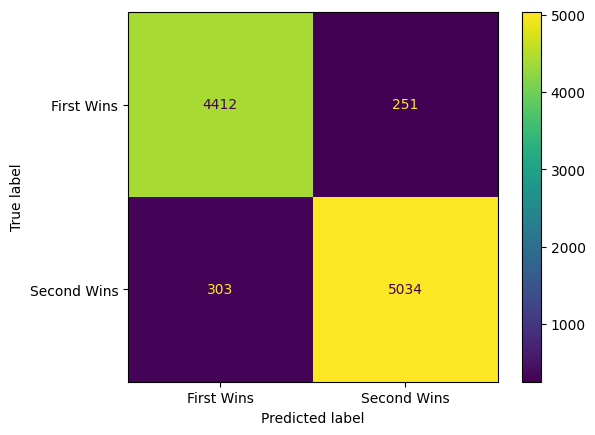

In [15]:
# Displaying results
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predictions), display_labels=["First Wins", "Second Wins"])
disp.plot()

In [16]:
test_df = pd.read_csv("Resources/test.csv")
test_df

,first_bug,first_dark,first_dragon,first_electric,first_fairy,first_fighting,first_fire,first_flying,first_ghost,first_grass,...,second_psychic,second_rock,second_steel,second_water,second_hp,second_attack,second_defense,second_sp_atk,second_sp_def,second_speed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,70,94,50,94,50,66,0


In [17]:
# Split our preprocessed data into our features and target arrays
#X_input = test_df.drop("winner", axis=1)
#y_input = test_df["winner"]

X_input_scaled = X_scaler.transform(test_df)

In [18]:
predictions = model.predict(test_df)
predictions

C:\Users\mrrit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0], dtype=int64)

In [19]:
# Calculating the accuracy score
# print(f"Accuracy: {accuracy_score(y_test, predictions)}")
# print(f"Precision: {precision_score(y_test, predictions)}")
# print(f"Recall: {recall_score(y_test, predictions)}")

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

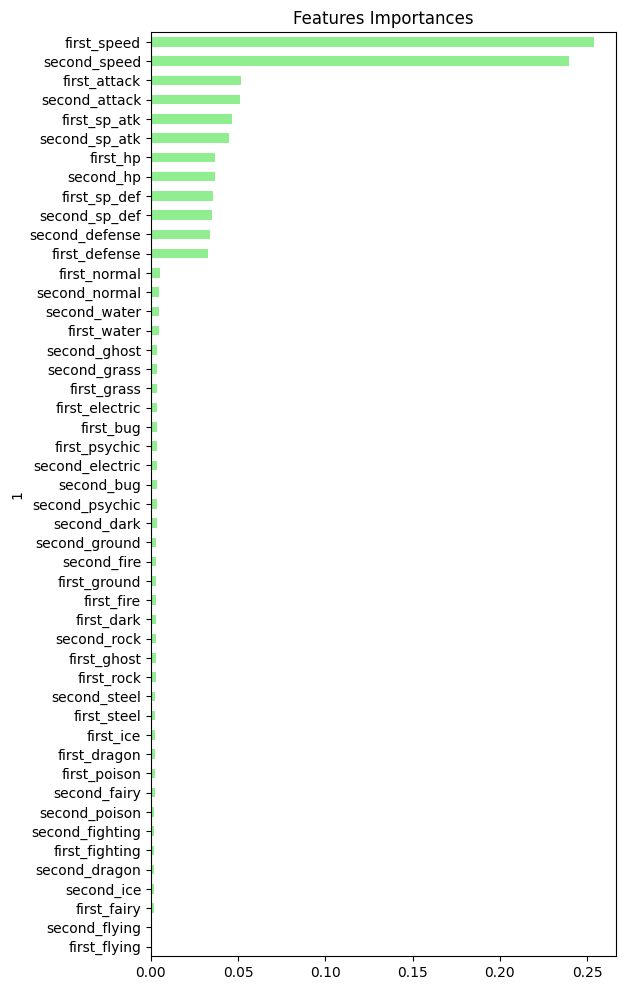

In [20]:
# Create a DataFrame to store feature importances
importances_df = pd.DataFrame(sorted(zip(model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)

# Sort the features by importance and plot them
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title='Features Importances', legend=False, figsize=(6, 12))

In [21]:
columns = list(df.columns)

# Extract the names of the most important features
sorted_importances_half = importances_df.index.to_list()[:24]
# Find the columns of the most important features
important_indices_h = [columns.index(feature) for feature in sorted_importances_half]
# Create training and testing sets with only the important features
important_train_features_h = X_train_scaled[:, important_indices_h]
important_test_features_h = X_test_scaled[:, important_indices_h]

In [22]:
import numpy as np
start_time = time.time()
# Train the expanded model on only the important features
model.fit(important_train_features_h, y_train);
# Make predictions on test data
predictions_h = model.predict(important_test_features_h)
# Performance metrics
print(f"Accuracy: {accuracy_score(y_test, predictions_h)}")
print(f"Precision: {precision_score(y_test, predictions_h)}")
print(f"Recall: {recall_score(y_test, predictions_h)}")
print("--- %s seconds ---" % (time.time() - start_time))

Accuracy: 0.9451
Precision: 0.9558263518659559
Recall: 0.9406033352070452
--- 23.06243634223938 seconds ---


In [23]:
# Comparison to previous results on unrefined features:
# Accuracy: 0.9446
# Precision: 0.9525070955534531
# Recall: 0.9432265317594154
# --- 23.365735292434692 seconds ---


In [24]:
# Extract the names of the most important features
sorted_importances_quarter = importances_df.index.to_list()[:12]
# Find the columns of the most important features
important_indices_q = [columns.index(feature) for feature in sorted_importances_quarter]
# Create training and testing sets with only the important features
important_train_features_q = X_train_scaled[:, important_indices_q]
important_test_features_q = X_test_scaled[:, important_indices_q]

In [25]:
start_time = time.time()
# Train the expanded model on only the important features
model.fit(important_train_features_q, y_train);
# Make predictions on test data
predictions_q = model.predict(important_test_features_q)
# Performance metrics
print(f"Accuracy: {accuracy_score(y_test, predictions_q)}")
print(f"Precision: {precision_score(y_test, predictions_q)}")
print(f"Recall: {recall_score(y_test, predictions_q)}")
print("--- %s seconds ---" % (time.time() - start_time))

Accuracy: 0.9472
Precision: 0.9593123209169054
Recall: 0.9409780775716695
--- 22.861035346984863 seconds ---


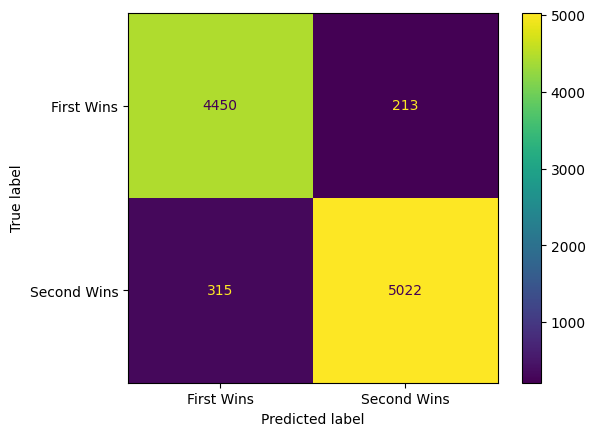

In [26]:
disp_q = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predictions_q), display_labels=["First Wins", "Second Wins"])
disp_q.plot()

In [27]:
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [28]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [29]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(important_train_features_q, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\mrrit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
123 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
66 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mrrit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mrrit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pa

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [30]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [38]:
import time
start_time = time.time()

best_random = rf_random.best_estimator_
predictions_rs = best_random.predict(important_test_features_q)

print(f"Accuracy: {accuracy_score(y_test, predictions_rs)}")
print(f"Precision: {precision_score(y_test, predictions_rs)}")
print(f"Recall: {recall_score(y_test, predictions_rs)}")

print("--- %s seconds ---" % (time.time() - start_time))

Accuracy: 0.9497
Precision: 0.9605564024390244
Recall: 0.9445381300356005
--- 5.499480485916138 seconds ---


In [32]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [90, 100, 110],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [5, 8, 10],
    'n_estimators': [1400, 1600, 1800]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [33]:
grid_search.fit(X_train_scaled, y_train)
grid_search.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1800}

In [40]:
start_time = time.time()

best_grid = grid_search.best_estimator_
predictions_grid = best_grid.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, predictions_grid)}")
print(f"Precision: {precision_score(y_test, predictions_grid)}")
print(f"Recall: {recall_score(y_test, predictions_grid)}")

print("--- %s seconds ---" % (time.time() - start_time))

Accuracy: 0.9461
Precision: 0.9540121120363361
Recall: 0.9445381300356005
--- 11.096784591674805 seconds ---


In [42]:
grid_search.fit(important_train_features_q, y_train)
grid_search.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


{'bootstrap': False,
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1600}

In [43]:
start_time = time.time()

best_grid_q = grid_search.best_estimator_
predictions_grid_q = best_grid.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, predictions_grid_q)}")
print(f"Precision: {precision_score(y_test, predictions_grid_q)}")
print(f"Recall: {recall_score(y_test, predictions_grid_q)}")

print("--- %s seconds ---" % (time.time() - start_time))

Accuracy: 0.9461
Precision: 0.9540121120363361
Recall: 0.9445381300356005
--- 10.409972906112671 seconds ---


## Neural Network

In [155]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=90, activation="relu", input_dim=48))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=40, activation="relu"))

# OPTIMIZATION: Increased units to 40 on Second Layer
#n.add(tf.keras.layers.Dense(units=120, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_71 (Dense)                │ (None, 90)             │         4,410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 40)             │         3,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,091 (31.61 KB)

 Trainable params: 8,091 (31.61 KB)

 Non-trainable params: 0 (0.00 B)

In [156]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [157]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 954us/step - accuracy: 0.8168 - loss: 0.4170
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9109 - loss: 0.2662
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step - accuracy: 0.9374 - loss: 0.1746
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9483 - loss: 0.1484
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9526 - loss: 0.1378
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - accuracy: 0.9561 - loss: 0.1271
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - accuracy: 0.9591 - loss: 0.1175
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - accuracy: 0.9616 - loss: 0.1124
Epoch 9/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - accuracy: 0.9633 - loss: 0.1070
Epoch 10/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step - accuracy: 0.9651 - loss: 0.1028
Epoch 11/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step - accuracy: 0.9664 - loss: 0.0975
Epo

In [158]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

313/313 - 0s - 1ms/step - accuracy: 0.9580 - loss: 0.2580
Loss: 0.2580108940601349, Accuracy: 0.9580000042915344


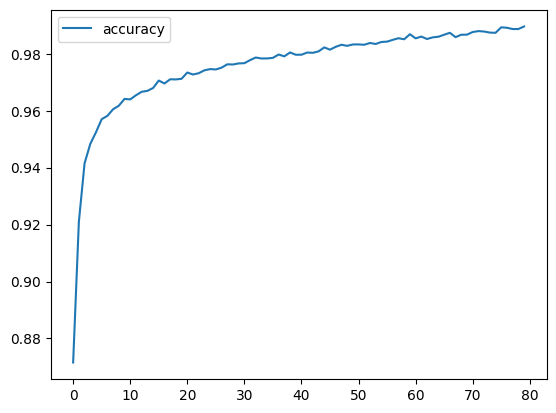

In [150]:
import matplotlib.pyplot as plt

history_df = pd.DataFrame(fit_model.history)
history_df.plot(y="accuracy")
plt.show()

In [27]:
# test_df = pd.read_csv("Resources/test.csv")
# test_df